# 🏠 House Price Prediction with Multiple ML Models

This project predicts house prices using different machine learning models and compares their accuracy and training time.  
We'll use:
- **Python** for implementation
- **NumPy** & **Pandas** for data handling
- **Matplotlib** for visualization
- **Scikit Learn** for linear regression and decision trees
- **TensorFlow** for neural networks

## Goals:
1. Load and explore the dataset
2. Data visualization
3. Preprocess data (handle missing values, scaling, encoding)
4. Train multiple models
5. Compare accuracy & execution time
6. Visualize results

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import time
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")

Libraries imported successfully!
TensorFlow version: 2.20.0


1. **Data Loading and Exploration**

In [5]:
# Load the datasets
try:
    train_data = pd.read_csv('train.csv')
    test_data = pd.read_csv('test.csv')
    print("Data loaded successfully!")
    print(f"Training data shape: {train_data.shape}")
    print(f"Test data shape: {test_data.shape}")
except FileNotFoundError:
    print("Please make sure 'train.csv' and 'test.csv' are in your current directory")

# Display basic information about the dataset
print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)
print(train_data.head())
print(f"\nDataset Info:")
print(f"Number of features: {train_data.shape[1]-1}")
print(f"Number of training samples: {train_data.shape[0]}")
print(f"Target variable: SalePrice")

# Check for missing values
print("\nMissing values in training data:")
missing_values = train_data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values.head(10))

# Basic statistics of the target variable
print(f"\nTarget Variable (SalePrice) Statistics:")
print(train_data['SalePrice'].describe())

Data loaded successfully!
Training data shape: (1460, 81)
Test data shape: (1459, 80)

DATASET OVERVIEW
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN  

2. **Data Visualization**

Here is a short description for each of the four graphs:

**Distribution of SalePrice (top-left):**
Shows the raw distribution of house prices in the dataset. It’s often right-skewed, meaning there are many moderately priced homes and fewer very expensive ones.

**Log Distribution of SalePrice (top-right):**
Displays the distribution of the logarithm of house prices. This transformation reduces skewness, making the data closer to a normal distribution, which is useful for regression models.

**Top 20 Features with Missing Values (bottom-left):**
A bar chart highlighting which features have the most missing data. This helps identify columns that may require data cleaning, imputation, or removal.

**Top 10 Features Correlated with SalePrice (bottom-right):**
A bar chart of numerical features most strongly correlated with the target variable (SalePrice). This highlights which features are most predictive and useful for modeling.

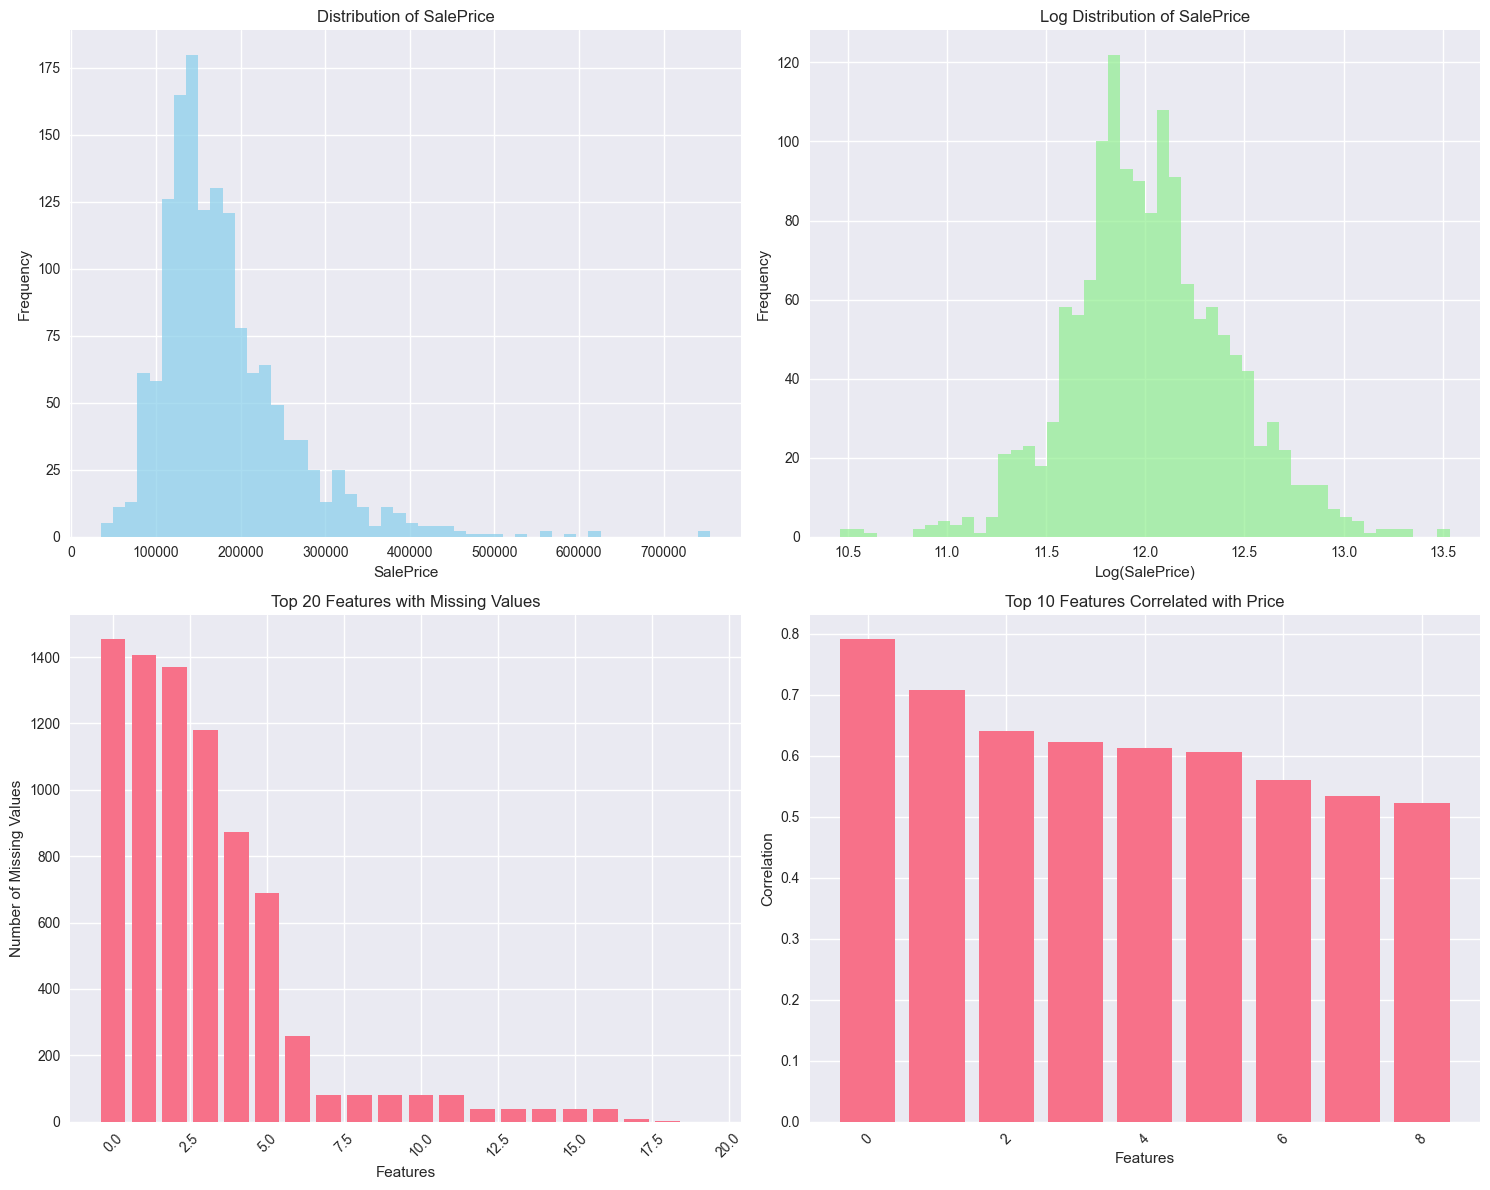

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

#Distribution of target variable
axes[0, 0].hist(train_data['SalePrice'], bins=50, alpha=0.7, color='skyBlue')
axes[0, 0].set_title('Distribution of SalePrice')
axes[0, 0].set_xlabel('SalePrice')
axes[0, 0].set_ylabel('Frequency')

# Log distribution of target variable
axes[0, 1].hist(np.log1p(train_data['SalePrice']), bins=50, alpha=0.7, color='lightgreen')
axes[0, 1].set_title('Log Distribution of SalePrice')
axes[0, 1].set_xlabel('Log(SalePrice)')
axes[0, 1].set_ylabel('Frequency')

# Missing values visualization
missing_data = train_data.isnull().sum().sort_values(ascending=False).head(20)
axes[1, 0].bar(range(len(missing_data)), missing_data.values)
axes[1, 0].set_title('Top 20 Features with Missing Values')
axes[1, 0].set_xlabel('Features')
axes[1, 0].set_ylabel('Number of Missing Values')
axes[1, 0].tick_params(axis='x', rotation=45)

# Correlation with target variable (only for numerical features)
numerical_features = train_data.select_dtypes(include=[np.number]).columns
correlations = train_data[numerical_features].corr()['SalePrice'].sort_values(ascending=False)
top_corr = correlations.head(10)[1:]
axes[1,1].bar(range(len(top_corr)), top_corr.values)
axes[1,1].set_title('Top 10 Features Correlated with Price')
axes[1,1].set_xlabel('Features')
axes[1,1].set_ylabel('Correlation')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()